In [3]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
##loading the dataset
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06T14:59:43Z,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5620410/review

In [6]:
df["dateAdded"] = pd.to_datetime(df.dateAdded)

#split columns
df["date"] = df["dateAdded"].dt.date
df["time"] = df["dateAdded"].dt.time

In [7]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,date,time
0,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32
1,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32
2,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32
3,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32
4,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   28332 non-null  object             
 1   dateAdded            28332 non-null  datetime64[ns, UTC]
 2   dateUpdated          28332 non-null  object             
 3   name                 28332 non-null  object             
 4   asins                28332 non-null  object             
 5   brand                28332 non-null  object             
 6   categories           28332 non-null  object             
 7   primaryCategories    28332 non-null  object             
 8   imageURLs            28332 non-null  object             
 9   keys                 28332 non-null  object             
 10  manufacturer         28332 non-null  object             
 11  manufacturerNumber   28332 non-null  object             
 12  reviews.date      

In [9]:
##conversion of time to part of day
import datetime

# Define a function to extract the time period from a timestamp
def timeofday(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 5:
        return "night"
    elif 5 <= hour < 7:
        return "early morning"
    elif 7 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "noon"
    elif 17 <= hour < 19:
        return "early evening"
    else:
        return "evening"

df['timeofday'] = df.apply(lambda row : timeofday(row['time']), axis=1)

In [10]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,date,time,timeofday
0,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
1,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
2,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
3,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
4,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning


In [11]:
df.tail()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,date,time,timeofday
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,I bought this for my niece for a Christmas gif...,yes it is a great tablet.,fireman21,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon
28329,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,"Very nice for light internet browsing, keeping...",You get a lot for the price!,suzannalicious,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon
28330,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!,SandyJ,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon
28331,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,4,http://reviews.bestbuy.com/3545/5620410/review...,"At ninety dollars, the expectionations are low...",You get what your paying for,Hung,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon


In [22]:
df

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,date,time,timeofday
0,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
1,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
2,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
3,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
4,AVpgNzjwLJeJML43Kpxn,2015-10-30 08:59:32+00:00,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",2015-10-30,08:59:32,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd8tabletwithalexa8hddis...",...,0.0,5,http://reviews.bestbuy.com/3545/5620410/review...,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift,Mom2twinsplus1,http://reviews.bestbuy.com/3545/5620410/review...,2017-03-06,14:59:43,noon
28328,AVqkIhxunnc1JgDc3kg_,2017-03-06 14:59:43+00:00,2019-02-23T02:49:38Z,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",B018T075DC,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/b018t075dc,firehd

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   28332 non-null  object             
 1   dateAdded            28332 non-null  datetime64[ns, UTC]
 2   dateUpdated          28332 non-null  object             
 3   name                 28332 non-null  object             
 4   asins                28332 non-null  object             
 5   brand                28332 non-null  object             
 6   categories           28332 non-null  object             
 7   primaryCategories    28332 non-null  object             
 8   imageURLs            28332 non-null  object             
 9   keys                 28332 non-null  object             
 10  manufacturer         28332 non-null  object             
 11  manufacturerNumber   28332 non-null  object             
 12  reviews.date      

In [14]:
##importing libraries for visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

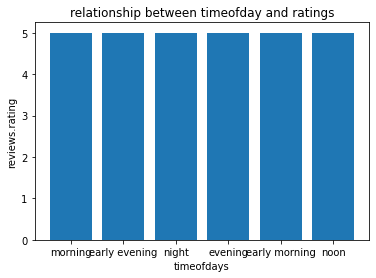

In [17]:
import matplotlib.pyplot as plt

# Create bar plot
plt.bar(x, y)

# Add labels and title
plt.xlabel('timeofdays')
plt.ylabel('reviews.rating')
plt.title('relationship between timeofday and ratings')

# Show plot
plt.show()

In [ ]:
##correletion between time of day and rating

In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode string column as integers
encoder = LabelEncoder()
df['timeofday'] = encoder.fit_transform(df['timeofday'])

# Calculate correlation
corr = df['reviews.rating'].corr(df['timeofday'])

# Print correlation coefficient
print('Correlation coefficient:', corr)

Correlation coefficient: 0.010229927857426808
